In [1]:
from operators import BlockMatrixOperator, BlockTriangularPreconditioner
from tunnel_with_subdomains import load_matrices_from_hdf5, load_vectors_from_hdf5
from test_helper_functions import test_fgmres, test_dcg
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import time

In [12]:
def load_data(problem_no):
    path_to_data = f"exported_data_scaled/testrun_{problem_no}/"

    # loading
    A_blocks = load_matrices_from_hdf5(f"{path_to_data}data_as_blocks.h5")
    Ptdiagblocks = load_matrices_from_hdf5(f"{path_to_data}data_diag_preco.h5")
    Ptblocks = load_matrices_from_hdf5(f"{path_to_data}data_triang_preco.h5")
    rhs_u, rhs_p = load_vectors_from_hdf5(f"{path_to_data}data_rhs.h5")  # each rhs_* is a list of ndarrays
    sol_u, sol_p = load_vectors_from_hdf5(f"{path_to_data}data_sol.h5")  # each rhs_* is a list of ndarrays
    return A_blocks, Ptdiagblocks, Ptblocks, rhs_u, rhs_p, sol_u, sol_p

In [13]:
all_results = []
for problem_no in range(20):
    A_blocks, Ptdiagblocks, Ptblocks, rhs_u, rhs_p, sol_u, sol_p = load_data(problem_no)
    print(f"\n Problem {problem_no}\n")
    iter_list, err_list, times_coarse_solver, times_fgmres, times_overhead, M = test_fgmres(
        A_blocks, Ptblocks, rhs_u, sol_u, rhs_p, sol_p, buffer_size=15, type="coarse", use_dcg=True, tol=(1e-4, 1e-4))

    all_results.append({"iter": iter_list, "err": err_list, "times_coarse_solver": times_coarse_solver, "times_fgmres": times_fgmres,
                "times_overhead": times_overhead, "M": M})


 Problem 0

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............
 Problem 1

....................................................................................................
....................................................................................................
..................................................

In [19]:

time_fgmres = []
times_coarse_solver = []
time_dcg_upper = []
time_dcg_lower = []

iters_fgmres = []
iters_dcg_upper = []
iters_dcg_lower = []
for problem_no in range(20):
    time_fgmres.append(sum(all_results[problem_no]["times_fgmres"]))
    times_coarse_solver.append(sum(all_results[problem_no]["times_coarse_solver"]))
    time_dcg_upper.append(sum(all_results[problem_no]["M"].times_upper))
    time_dcg_lower.append(sum(all_results[problem_no]["M"].times_lower))

    iters_fgmres.append(sum(all_results[problem_no]["iter"]))
    iters_dcg_upper.append(sum(all_results[problem_no]["M"].all_iters_upper))
    iters_dcg_lower.append(sum(all_results[problem_no]["M"].all_iters_lower))

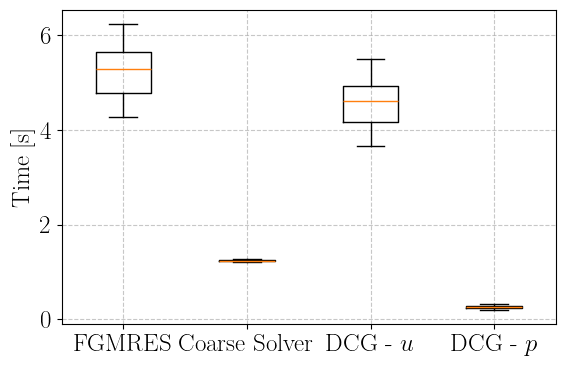

In [25]:
fontsize = 18
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": fontsize
})

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot([time_fgmres, times_coarse_solver, time_dcg_upper, time_dcg_lower])
ax.set_xticklabels(["FGMRES", "Coarse Solver", "DCG - $u$", "DCG - $p$"])
ax.set_ylabel("Time [s]")
# Grid and legend
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# Save the plot to PDF
plt.savefig('boxplot_times.pdf', format='pdf', bbox_inches='tight')

# Optional: Print confirmation
plt.show()

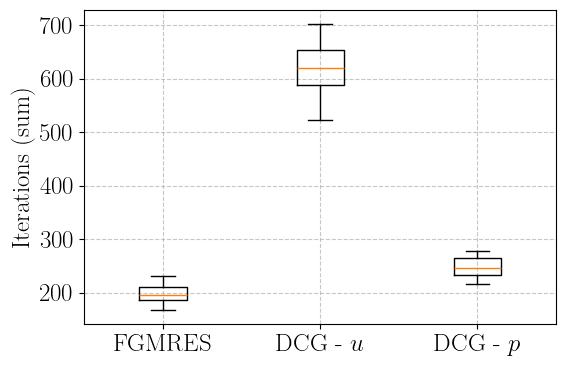

In [26]:
# Set LaTeX as the default text renderer
fontsize = 18
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": fontsize
})

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot([iters_fgmres, iters_dcg_upper, iters_dcg_lower])
ax.set_xticklabels(["FGMRES", "DCG - $u$", "DCG - $p$"])
ax.set_ylabel("Iterations (sum)")

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# Save the plot to PDF
plt.savefig('boxplot_iter.pdf', format='pdf', bbox_inches='tight')

# Optional: Print confirmation
plt.show()
